In [1]:
from feynml import FeynmanDiagram, Leg, Propagator, Vertex, PDG
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.auto.position import feynman_adjust_points,auto_grid,auto_align_legs,auto_remove_intersections_by_align_legs
import numpy as np
import pyfeyn2
print(pyfeyn2.__version__)

2.3.4.4


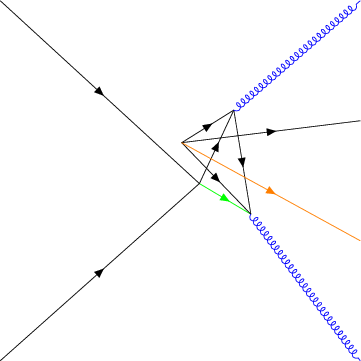

3
10
5
4
6
8
6
4
3
10
5
7
4
5
3
8
4
3
5
5
7
5
6
6
3
10
5
4
6
8
6
4
3
10
5
7
4
5
3
8
4
3
5
5
7
5
6
6


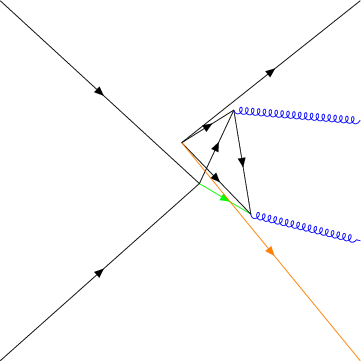

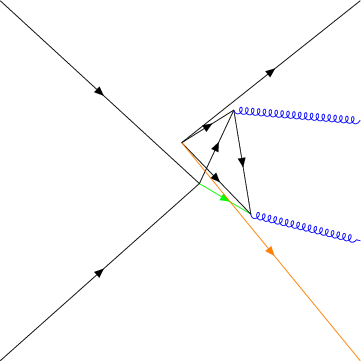

In [2]:
v1 = Vertex("v1").with_shape("dot")
v2 = Vertex("v2").with_style("symbol : dot")

fd = FeynmanDiagram().with_rules(
    """ * {color: red;} 
        [type=fermion] {color: blue; line: gluon}
        #p1 {color: green;}
        :not([type=fermion]) { color : black; line: fermion}""")
v1 = Vertex("v1")
v2 = Vertex("v2")
v3 = Vertex("v3")
v4 = Vertex("v4")
p1 = Propagator("p1").connect(v1, v2).with_type("gluon")
p2 = Propagator("p2").connect(v1, v3).with_type("gluon")
p3 = Propagator("p3").connect(v3, v2).with_type("gluon")
p4 = Propagator("p4").connect(v4, v3).with_type("gluon")
p5 = Propagator("p5").connect(v4, v2).with_type("gluon")
l1 = Leg("l1").with_target(v1).with_type("gluon").with_incoming().with_xy(2, 1)
l2 = Leg("l2").with_target(v1).with_type("gluon").with_incoming().with_xy(-2, -1)
l3 = Leg("l3").with_target(v2).with_type("fermion").with_outgoing().with_xy(2, -2).with_class("blue")
l4 = Leg("l4").with_target(v3).with_type("fermion").with_outgoing().with_xy(2, 2)
l5 = Leg("l5").with_target(v4).with_type("gluon").with_outgoing().with_xy(2, 1)
l6 = Leg("l6").with_target(v4).with_type("gluon").with_outgoing().with_xy(-2, -1)

l6.style.color = "orange"

fd.propagators.extend([p1, p2, p3, p4, p5])
fd.vertices.extend([v1, v2, v3, v4])
fd.legs.extend([l1, l2, l3, l4, l5, l6])
fd = feynman_adjust_points(fd,size=10)
fd = auto_align_legs(fd)
tfd = TikzFeynmanRender(fd)
tfd.render()
fd = auto_remove_intersections_by_align_legs(fd)
tfd = TikzFeynmanRender(fd)
tfd.render()

0
2
1
0
1
1
1
1
0
2
1
1
1
1
1
1
0
1
2
2
1
1
1
1
0
2
1
0
1
1
1
1
0
2
1
1
1
1
1
1
0
1
2
2
1
1
1
1


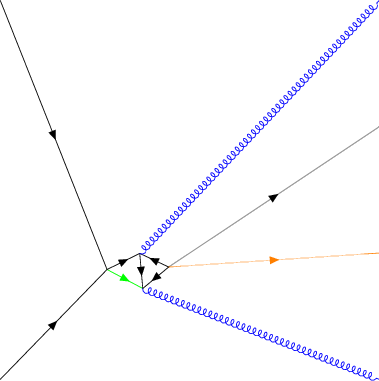

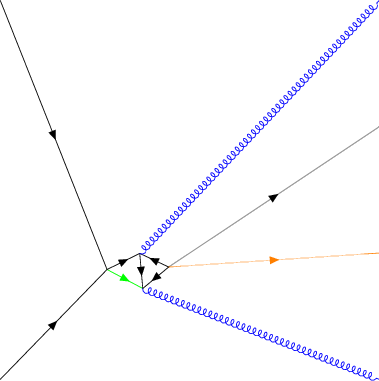

In [3]:
fd = auto_remove_intersections_by_align_legs(fd,adjust_points=True,size=10)
tfd = TikzFeynmanRender(fd)
tfd.render()